In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from time import perf_counter
from time import process_time
import timeit

In [16]:
# loading the dataset to a pandas DataFrame 
df = pd.read_csv('/kaggle/input/creditcard12/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [17]:
target = 'Class'
X = df.loc[:, df.columns!=target]
Y = df.loc[:, df.columns==target]

In [18]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass


def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

Class
0    284315
1       492
Name: count, dtype: int64


Class
0    142157
1       246
Name: count, dtype: int64

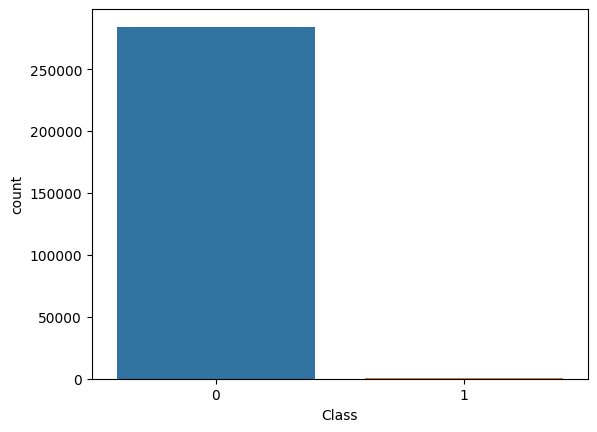

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.5, 
                                                    random_state=42)


ax = sns.countplot(x=target, data=df)
print(df[target].value_counts())
Y_train[target].value_counts()

In [20]:
sm = SMOTE(random_state=12, sampling_strategy=1.0)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count
X=x_train_res
Y=y_train_res

# StandardScaler

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [23]:
scaled_data.shape

(284314, 30)

In [24]:
x_pca.shape

(284314, 10)

In [25]:
pca.explained_variance_ratio_

array([0.38753097, 0.11674663, 0.05550407, 0.05352408, 0.04438517,
       0.04196777, 0.03669676, 0.0341975 , 0.02869816, 0.02793029])

In [26]:
pca.n_components_

10

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(x_pca, Y, test_size=0.2, random_state=30)


# Logistic regression

In [28]:
start_time = perf_counter()
logModel = LogisticRegression()
logModel.fit(X_train, Y_train)

#Accuracy on training data
x_train_prediction = logModel.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 
x_test_prediction = logModel.predict(X_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)
generate_model_report(Y_test, x_test_prediction)
end_time = perf_counter()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on Training data : ,  0.9611608654171667
Accuracy score on Test data : 0.9617325853366864
Accuracy =  0.9617325853366864
Precision =  0.987034760254834
Recall =  0.9354542565587374
F1 Score =  0.960552554294623
Elapsed time :  0.8063446379997004


# Decision Tree

In [29]:
start_time = timeit.default_timer()
from sklearn import tree
classify_ = tree.DecisionTreeClassifier()
classify_ = classify_.fit(X_train,Y_train)


#Accuracy on training data
x_train_prediction = classify_.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 
x_test_prediction = classify_.predict(X_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)

generate_model_report(Y_test, x_test_prediction)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

Accuracy on Training data : ,  1.0
Accuracy score on Test data : 0.9965179466436874
Accuracy =  0.9965179466436874
Precision =  0.9953848863836533
Recall =  0.9976342643268247
F1 Score =  0.9965083059993651
Elapsed time :  7.019260995999957


# ANN

In [ ]:
start_time = timeit.default_timer()
from sklearn.neural_network import MLPClassifier

MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPC.fit(X_train,Y_train)

#Accuracy on training data
x_train_prediction = MLPC.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 
x_test_prediction = MLPC.predict(X_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)

generate_model_report(Y_test, x_test_prediction)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Random Forest

In [ ]:
start_time = timeit.default_timer()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)
rf.fit(X_train, Y_train)

x_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 
x_test_prediction = rf.predict(X_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)

generate_model_report(Y_test, x_test_prediction)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

# KNN

In [ ]:
start_time =timeit.default_timer()
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(n_neighbors =3)
model.fit(X_train,Y_train)
#Accuracy on training data
x_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)
# accuracy on test data 
x_test_prediction  = model.predict(X_test)
test_data_accuracy = accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)
Y_Test_Pred = model.predict(X_test)
generate_model_report(Y_test, Y_Test_Pred)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

# NB

In [ ]:
start_time = timeit.default_timer()
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB(binarize=0.0)
model.fit(X_train,Y_train)

#Accuracy on training data
x_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)
# accuracy on test data 
x_test_prediction = model.predict(X_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)
generate_model_report(Y_test, x_test_prediction)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

# SVM

In [ ]:
start_time = timeit.default_timer()
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train)
#Accuracy on training data
x_train_prediction = svc.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)
# accuracy on test data 
x_test_prediction = svc.predict(X_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)
generate_model_report(Y_test, x_test_prediction)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

# SVM(kernel=linear)

In [ ]:
start_time = timeit.default_timer()
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,Y_train)
#Accuracy on training data
x_train_prediction = svc.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)
# accuracy on test data 
x_test_prediction = svc.predict(X_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)
generate_model_report(Y_test, x_test_prediction)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)